In [26]:
# Orignal tutorial: https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits/01_circuit_basics.ipynb
import numpy as np
from qiskit import QuantumCircuit

In [27]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

In [28]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

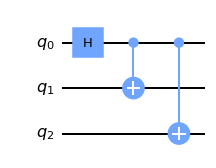

In [29]:
circ.draw('mpl')

In [30]:
from qiskit.quantum_info import Statevector

# https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html 
# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3) # class Statevector(data, dims=None), here dim is 2^3= 8 states , 3 bits

# Evolve the state by the quantum circuit
# https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.evolve.html 
# Statevector.evolve(other, qargs=None) where: other (Operator) – The operator to evolve by.
# qargs (list) – a list of Statevector subsystem positions to apply the operator on
state = state.evolve(circ)

#draw using latex
state.draw('latex')  

<IPython.core.display.Latex object>

In [31]:
from qiskit.visualization import array_to_latex

#Alternative way of representing in latex
array_to_latex(state)


<IPython.core.display.Latex object>

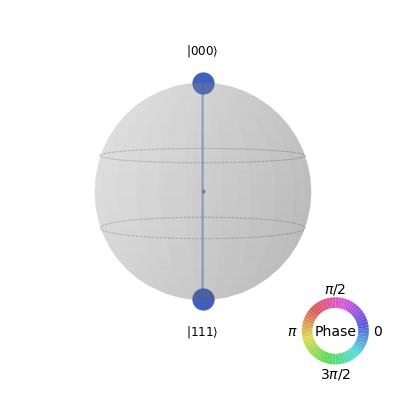

In [32]:
state.draw('qsphere')

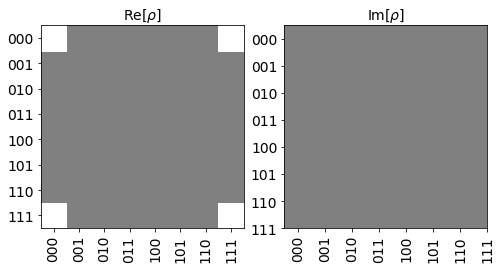

In [33]:
state.draw('hinton')

In [34]:
from qiskit.quantum_info import Operator

U = Operator(circ)

# Show the results
U.data

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.      

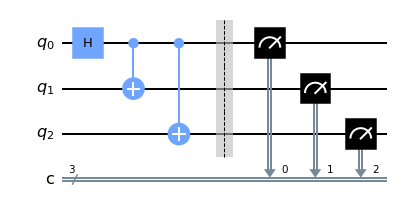

In [35]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before)
# as compose must put a smaller circuit into a larger one. 
# QuantumCircuit.compose(other, qubits=None, clbits=None, front=False, inplace=False, wrap=False)
qc = meas.compose(circ, range(3), front=True)

#drawing the circuit
qc.draw('mpl')

In [36]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile

# Use AerSimulator
from qiskit.providers.aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [37]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'000': 497, '111': 527}


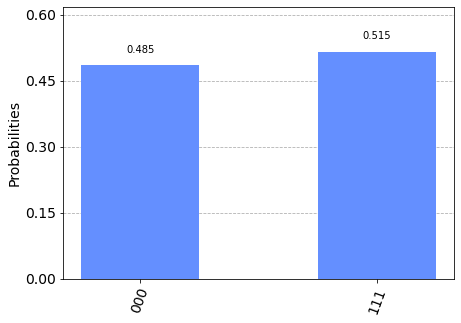

In [38]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [39]:
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

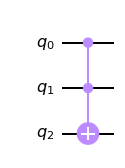

In [40]:
circ_1 = QuantumCircuit(3)
circ_1.ccx(0, 1, 2)
circ_1.draw(output='mpl')

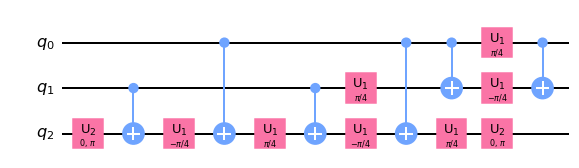

In [41]:
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u1', 'u2', 'u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(circ_1)
new_circ.draw(output='mpl')

In [42]:
from qiskit.transpiler import passes
[pass_ for pass_ in dir(passes) if pass_[0].isupper()]

['ALAPSchedule',
 'ALAPScheduleAnalysis',
 'ASAPSchedule',
 'ASAPScheduleAnalysis',
 'AlignMeasures',
 'ApplyLayout',
 'BIPMapping',
 'BarrierBeforeFinalMeasurements',
 'BasicSwap',
 'BasisTranslator',
 'CSPLayout',
 'CXCancellation',
 'CXDirection',
 'CheckCXDirection',
 'CheckGateDirection',
 'CheckMap',
 'Collect1qRuns',
 'Collect2qBlocks',
 'CollectLinearFunctions',
 'CollectMultiQBlocks',
 'CommutationAnalysis',
 'CommutativeCancellation',
 'ConsolidateBlocks',
 'ConstrainedReschedule',
 'ContainsInstruction',
 'CountOps',
 'CountOpsLongestPath',
 'CrosstalkAdaptiveSchedule',
 'DAGFixedPoint',
 'DAGLongestPath',
 'Decompose',
 'DenseLayout',
 'Depth',
 'DynamicalDecoupling',
 'EchoRZXWeylDecomposition',
 'EnlargeWithAncilla',
 'Error',
 'FixedPoint',
 'FullAncillaAllocation',
 'GateDirection',
 'GatesInBasis',
 'HoareOptimizer',
 'InstructionDurationCheck',
 'InverseCancellation',
 'Layout2qDistance',
 'LayoutTransformation',
 'LinearFunctionsSynthesis',
 'LinearFunctionsToPermuta

In [43]:
from qiskit.transpiler import CouplingMap, Layout
from qiskit.transpiler.passes import BasicSwap, LookaheadSwap, StochasticSwap

coupling = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]

circuit = QuantumCircuit(7)
circuit.h(3)
circuit.cx(0, 6)
circuit.cx(6, 0)
circuit.cx(0, 1)
circuit.cx(3, 1)
circuit.cx(3, 0)

coupling_map = CouplingMap(couplinglist=coupling)

bs = BasicSwap(coupling_map=coupling_map)
pass_manager = PassManager(bs)
basic_circ = pass_manager.run(circuit)

ls = LookaheadSwap(coupling_map=coupling_map)
pass_manager = PassManager(ls)
lookahead_circ = pass_manager.run(circuit)

ss = StochasticSwap(coupling_map=coupling_map)
pass_manager = PassManager(ss)
stochastic_circ = pass_manager.run(circuit)

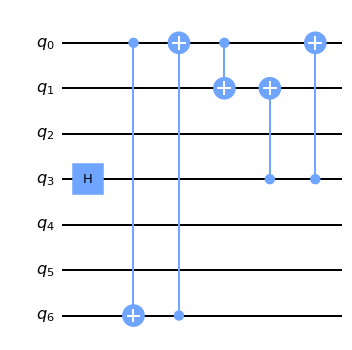

In [44]:
circuit.draw(output='mpl')

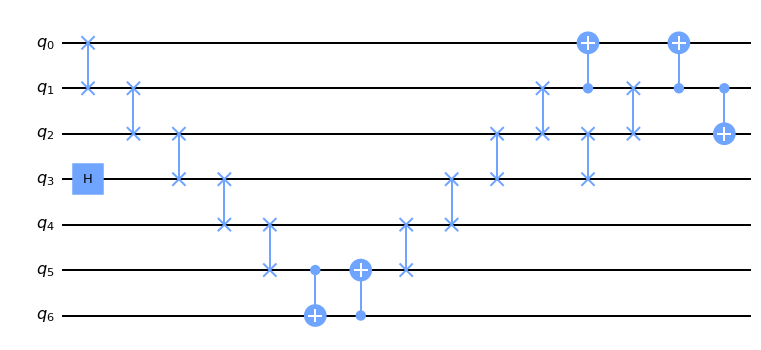

In [45]:
basic_circ.draw(output='mpl')

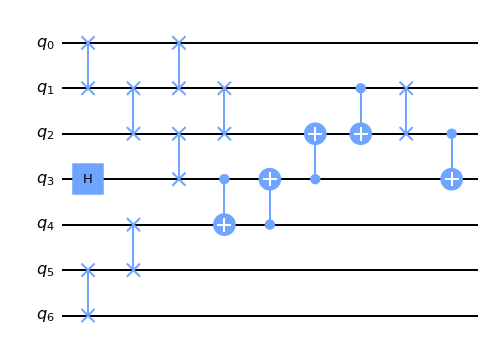

In [46]:
lookahead_circ.draw(output='mpl')

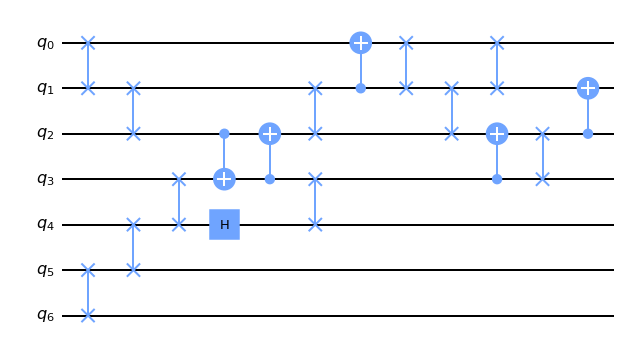

In [47]:
stochastic_circ.draw(output='mpl')